# Airline Analysis

The airline data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-offdelay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?


```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [5]:
df = pd.read_csv("flight.csv")
print(df.head())
print(df.info())


   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entri

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64


<Figure size 640x480 with 0 Axes>

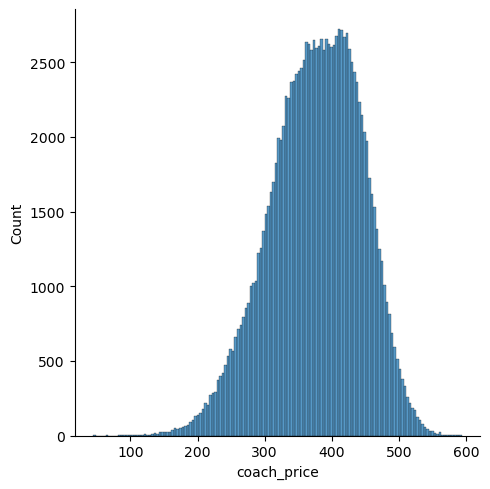

In [12]:
print(df.coach_price.describe(include='all'))
sns.displot(df.coach_price)
plt.show()
plt.clf()

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64


<Figure size 640x480 with 0 Axes>

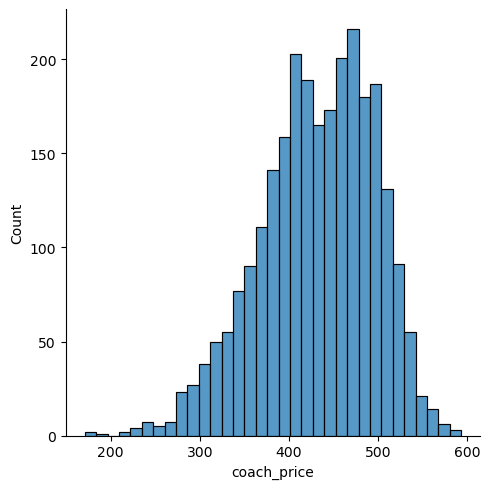

In [20]:
print(df.coach_price[df.hours == 8].describe(include='all'))

sns.displot(df.coach_price[df.hours == 8])
plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

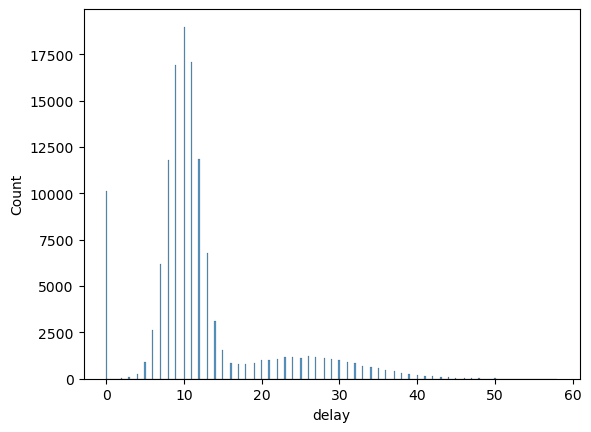

In [18]:
## Task 3
sns.histplot(df.delay[df.delay <= 500])
plt.show()
plt.clf()
 

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

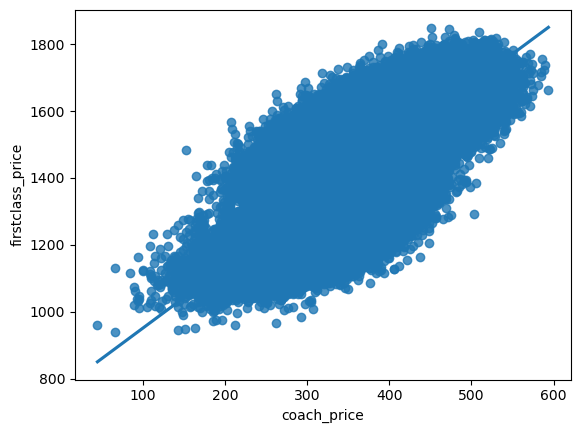

In [26]:
sns.regplot(x=df.coach_price, y=df.firstclass_price)
plt.show()
plt.clf()


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

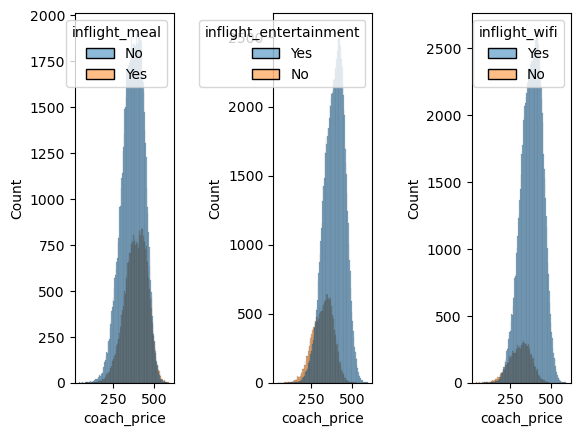

In [46]:
plt.subplot(1, 3, 1)
sns.histplot(x=df.coach_price, hue = df.inflight_meal)
plt.subplot(1, 3, 2)
sns.histplot(x=df.coach_price, hue = df.inflight_entertainment)
plt.subplot(1, 3, 3)
sns.histplot(x=df.coach_price, hue = df.inflight_wifi)
plt.subplots_adjust(wspace=1)
plt.show()
plt.clf()


6. How does the number of passengers change in relation to the length of flights?

<Figure size 640x480 with 0 Axes>

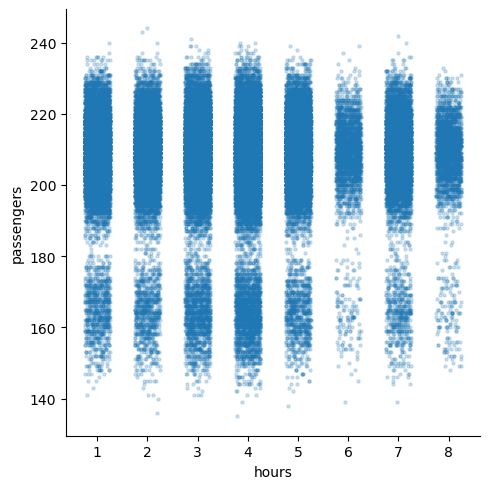

In [51]:
sns.lmplot(x = "hours", y = "passengers", data = df, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

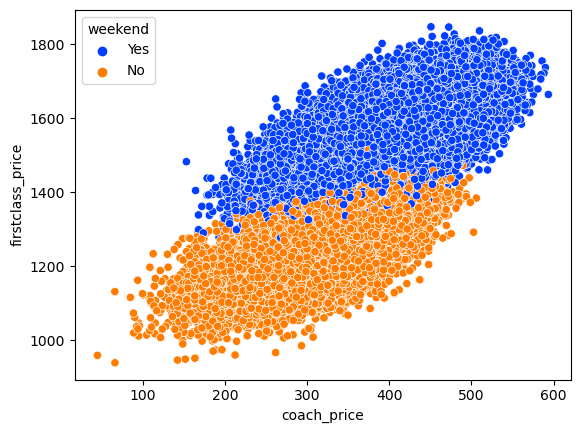

In [55]:
sns.scatterplot(x = df.coach_price, y =df.firstclass_price, hue=df.weekend, palette = "bright")
plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

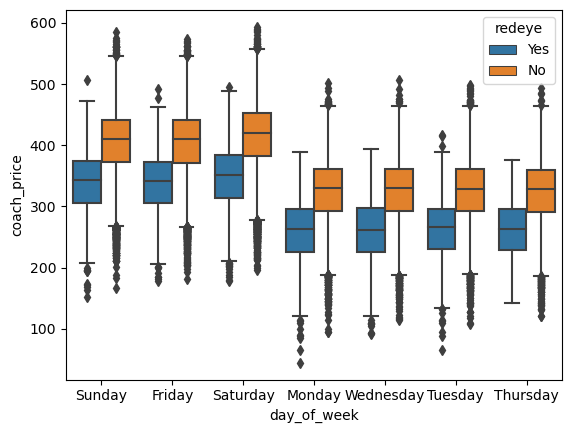

In [58]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = df)
plt.show()
plt.clf()